In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rheasaxena","key":"d6f037a543752a06aac21fa8ab7d4aa2"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-03 07:25:55          17651  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10526  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5185  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3800  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [6]:
!kaggle datasets download -d kritanjalijain/amazon-reviews

 99% 1.28G/1.29G [00:09<00:00, 153MB/s]
100% 1.29G/1.29G [00:10<00:00, 138MB/s]


In [7]:
! unzip amazon-reviews.zip 

Archive:  amazon-reviews.zip
  inflating: amazon_review_polarity_csv.tgz  
  inflating: test.csv                
  inflating: train.csv               


In [8]:
data = pd.read_csv('/content/train.csv',names=['label','title','text'])

In [9]:
data['review'] = data[['title', 'text']].astype(str).apply(' '.join, axis=1)
data.drop('title', axis=1, inplace=True)
data.drop('text', axis=1, inplace=True)
data['label'].replace({2: 0}, inplace=True)
data

,label,review
0,0,Stuning even for the non-gamer This sound trac...
1,0,The best soundtrack ever to anything. I'm read...
2,0,Amazing! This soundtrack is my favorite music ...
3,0,Excellent Soundtrack I truly like this soundtr...
4,0,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
3599995,1,Don't do it!! The high chair looks great when ...
3599996,1,"Looks nice, low functionality I have used this..."
3599997,1,"compact, but hard to clean We have a small hou..."
3599998,1,what is it saying? not sure what this book is ...


In [10]:
print(data.info())
print("-"*80)
print("The Dataset contains class level count as\n", data["label"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   label   int64 
 1   review  object
dtypes: int64(1), object(1)
memory usage: 54.9+ MB
None
--------------------------------------------------------------------------------
The Dataset contains class level count as
 1    1800000
0    1800000
Name: label, dtype: int64


In [11]:
df1 = data[data['label'] == 0]
df2 = data[data['label'] == 1]
print(len(df1),len(df2))

1800000 1800000


In [12]:
df1 = df1.iloc[:150000]
df2 = df2.iloc[:150000]
frames = [df1, df2]

In [13]:
data_new = pd.concat(frames)
data_new

,label,review
0,0,Stuning even for the non-gamer This sound trac...
1,0,The best soundtrack ever to anything. I'm read...
2,0,Amazing! This soundtrack is my favorite music ...
3,0,Excellent Soundtrack I truly like this soundtr...
4,0,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
304215,1,Very Disappointed This product arrived broken ...
304217,1,"Missing Items As one other victim also writes,..."
304219,1,When is this thing going to arrive!!! I have a...
304220,1,everything missing I bought the package and li...


In [14]:
print(data_new.isnull().sum())

label     0
review    0
dtype: int64


In [15]:
print(len(data_new.review))
print(len(data_new.review.unique()))

300000
300000


In [16]:
def smiley(a):
    x1=a.replace(":‑)","happy")
    x2=x1.replace(";)","happy")
    x3=x2.replace(":-}","happy")
    x4=x3.replace(":)","happy")
    x5=x4.replace(":}","happy")
    x6=x5.replace("=]","happy")
    x7=x6.replace("=)","happy")
    x8=x7.replace(":D","happy")
    x9=x8.replace("xD","happy")
    x10=x9.replace("XD","happy")
    x11=x10.replace(":‑(","sad")    #using 'replace' to convert emoticons
    x12=x11.replace(":‑[","sad")
    x13=x12.replace(":(","sad")
    x14=x13.replace("=(","sad")
    x15=x14.replace("=/","sad")
    x16=x15.replace(":[","sad")
    x17=x16.replace(":{","sad")
  
    x18=x17.replace(":P","playful")
    x19=x18.replace("XP","playful")
    x20=x19.replace("xp","playful")
  
    
    x21=x20.replace("<3","love")
    x22=x21.replace(":o","shock")
    x23=x22.replace(":-/","sad")
    x24=x23.replace(":/","sad")
    x25=x24.replace(":|","sad")
    return x25

In [17]:
data_new['review']=data_new['review'].apply(smiley)

In [18]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)   #using regular expressions to expand the contractions
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"@", " ", phrase)

    return phrase

In [19]:
data_new['review']=data_new['review'].apply(decontracted)

In [20]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmatize(x):
    temp = ""
    for i in range(len(x.split())):
        lem = lemmatizer.lemmatize(x.split()[i], pos="v")
        temp += lem + " "
    temp = temp.rstrip()
    return temp
    
from gensim.parsing.preprocessing import strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short, stem_text 
def clean_func(text):
    text = strip_tags(text)
    text = strip_punctuation(text)
    text = strip_multiple_whitespaces(text)
    text = remove_stopwords(text)
    text = strip_short(text, minsize=2)
    text = text.lower()
    text = lemmatize(text)
    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [21]:
data_new['review']=data_new['review'].apply(clean_func)

In [22]:
X=data.drop(['label'], axis = 1)  # seperating the class label
y=data["label"].values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud           
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from nltk.stem.snowball import SnowballStemmer

In [25]:
#Vectorizing
vectorizer = TfidfVectorizer() #Using TFIDF to vectorize the text

In [26]:
vectorizer = TfidfVectorizer(stop_words="english",min_df=10,max_features=1000) 
vectorizer.fit(X_train['review'].values)           # Training the TFIDF model
x_tr=vectorizer.transform(X_train['review'].values)
x_te=vectorizer.transform(X_test['review'].values)

In [27]:
print(x_tr.shape)
print(x_te.shape)

(2520000, 1000)
(1080000, 1000)


In [44]:
y = y_train
y_te = y_test

In [37]:
from sklearn import model_selection
from sklearn import metrics

In [45]:
NB_clf = MultinomialNB()

kf = model_selection.KFold(n_splits=5, shuffle=False)
kf_precision = []
kf_recall = []
kf_f1 =[]
for train_index, test_index in kf.split(x_tr):
    print("TRAIN:", train_index[:5], "TEST:", test_index[:5])
    
    X_train, X_test = x_tr[train_index], x_tr[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    NB_clf.fit(X_train, y_train)
    
    y_pred = NB_clf.predict(X_test)
    
    kf_precision.append(metrics.precision_score(y_test, y_pred, average="weighted"))
    kf_recall.append(metrics.recall_score(y_test, y_pred, average="weighted"))
    kf_f1.append(metrics.f1_score(y_test, y_pred, average="weighted"))
    
    print("precision={}".format(metrics.precision_score(y_test, y_pred, average="weighted")))
    print("recall=   {}".format(metrics.recall_score(y_test, y_pred, average="weighted")))
    print("f1=       {}".format(metrics.f1_score(y_test, y_pred, average="weighted")))
    print()

print("Precision")
print("Mean: ",np.mean(kf_precision),"  Std Dev: ",np.std(kf_precision))
print()
print("Recall")
print("Mean: ",np.mean(kf_recall),"  Std Dev: ",np.std(kf_recall))
print()
print("F1")
print("Mean: ",np.mean(kf_f1),"  Std Dev: ",np.std(kf_f1))

TRAIN: [504000 504001 504002 504003 504004] TEST: [0 1 2 3 4]
precision=0.8277141458350049
recall=   0.8274384920634921
f1=       0.8274111400605237

TRAIN: [0 1 2 3 4] TEST: [504000 504001 504002 504003 504004]
precision=0.828099292631322
recall=   0.8278690476190477
f1=       0.8278373401985342

TRAIN: [0 1 2 3 4] TEST: [1008000 1008001 1008002 1008003 1008004]
precision=0.8281947746110414
recall=   0.8279603174603175
f1=       0.8279320186110893

TRAIN: [0 1 2 3 4] TEST: [1512000 1512001 1512002 1512003 1512004]
precision=0.8280984570434144
recall=   0.827920634920635
f1=       0.8278930849098496

TRAIN: [0 1 2 3 4] TEST: [2016000 2016001 2016002 2016003 2016004]
precision=0.8273771259023247
recall=   0.8271805555555556
f1=       0.8271498043346154

Precision
Mean:  0.8278967592046215   Std Dev:  0.00030785756485329514

Recall
Mean:  0.8276738095238094   Std Dev:  0.00030977452198682287

F1
Mean:  0.8276446776229225   Std Dev:  0.0003101061935052402


In [49]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression(C=10000.0, max_iter = 1000,random_state=0)


kf = model_selection.KFold(n_splits=5, shuffle=False)
lr_precision = []
lr_recall = []
lr_f1 =[]
for train_index, test_index in kf.split(df1):
    print("TRAIN:", train_index[:5], "TEST:", test_index[:5])
    
    X_train, X_test = x_tr[train_index], x_tr[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    logreg_clf.fit(X_train, y_train)
    
    y_pred = logreg_clf.predict(X_test)
    
    lr_precision.append(metrics.precision_score(y_test, y_pred, average="weighted"))
    lr_recall.append(metrics.recall_score(y_test, y_pred, average="weighted"))
    lr_f1.append(metrics.f1_score(y_test, y_pred, average="weighted"))
    
    print("precision={}".format(metrics.precision_score(y_test, y_pred, average="weighted")))
    print("recall=   {}".format(metrics.recall_score(y_test, y_pred, average="weighted")))
    print("f1=       {}".format(metrics.f1_score(y_test, y_pred, average="weighted")))
    print()
    
print("Precision")
print("Mean: ",np.mean(lr_precision),"  Std Dev: ",np.std(lr_precision))
print()
print("Recall")
print("Mean: ",np.mean(lr_recall),"  Std Dev: ",np.std(lr_recall))
print()
print("F1")
print("Mean: ",np.mean(lr_f1),"  Std Dev: ",np.std(lr_f1))

TRAIN: [30000 30001 30002 30003 30004] TEST: [0 1 2 3 4]
precision=0.850483440295171
recall=   0.8503333333333334
f1=       0.8503175568252789

TRAIN: [0 1 2 3 4] TEST: [30000 30001 30002 30003 30004]
precision=0.851389697900477
recall=   0.8513666666666667
f1=       0.8513681465716683

TRAIN: [0 1 2 3 4] TEST: [60000 60001 60002 60003 60004]
precision=0.8537652772554382
recall=   0.8537
f1=       0.853688779943749

TRAIN: [0 1 2 3 4] TEST: [90000 90001 90002 90003 90004]
precision=0.8548427526304404
recall=   0.8548
f1=       0.8548011306268944

TRAIN: [0 1 2 3 4] TEST: [120000 120001 120002 120003 120004]
precision=0.8503598406784513
recall=   0.8503333333333334
f1=       0.8503338734641741

Precision
Mean:  0.8521682017519956   Std Dev:  0.001812099983479259

Recall
Mean:  0.8521066666666666   Std Dev:  0.0018237202514518175

F1
Mean:  0.852101897486353   Std Dev:  0.001824950762248301


In [55]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()


kf = model_selection.KFold(n_splits=5, shuffle=False)
kn_clf_precision = []
kn_clf_recall = []
kn_clf_f1 =[]
for train_index, test_index in kf.split(df1):
    print("TRAIN:", train_index[:5], "TEST:", test_index[:5])
    
    X_train, X_test = x_tr[train_index], x_tr[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    kn_clf.fit(X_train, y_train)
    
    y_pred = kn_clf.predict(X_test)
    
    kn_clf_precision.append(metrics.precision_score(y_test, y_pred, average="weighted"))
    kn_clf_precision.append(metrics.recall_score(y_test, y_pred, average="weighted"))
    kn_clf_f1.append(metrics.f1_score(y_test, y_pred, average="weighted"))
    
    print("precision={}".format(metrics.precision_score(y_test, y_pred, average="weighted")))
    print("recall=   {}".format(metrics.recall_score(y_test, y_pred, average="weighted")))
    print("f1=       {}".format(metrics.f1_score(y_test, y_pred, average="weighted")))
    print()
    
print("Precision")
print("Mean: ",np.mean(kn_clf_precision),"  Std Dev: ",np.std(kn_clf_precision))
print()
print("Recall")
print("Mean: ",np.mean(kn_clf_recall),"  Std Dev: ",np.std(kn_clf_recall))
print()
print("F1")
print("Mean: ",np.mean(kn_clf_f1),"  Std Dev: ",np.std(kn_clf_f1))

TRAIN: [30000 30001 30002 30003 30004] TEST: [0 1 2 3 4]
precision=0.5815755736679437
recall=   0.5652666666666667
f1=       0.5424455488224991

TRAIN: [0 1 2 3 4] TEST: [30000 30001 30002 30003 30004]
precision=0.5900398867190577
recall=   0.5610333333333334
f1=       0.5254735380483997

TRAIN: [0 1 2 3 4] TEST: [60000 60001 60002 60003 60004]
precision=0.5897570253727695
recall=   0.5680333333333333
f1=       0.5388143850358571

TRAIN: [0 1 2 3 4] TEST: [90000 90001 90002 90003 90004]
precision=0.5914102596121543
recall=   0.5639666666666666
f1=       0.5313468372618319

TRAIN: [0 1 2 3 4] TEST: [120000 120001 120002 120003 120004]
precision=0.598143460920327
recall=   0.5665333333333333
f1=       0.530601567218037

Precision
Mean:  0.5775759539625586   Std Dev:  0.013257171885673392

Recall
Mean:  nan   Std Dev:  nan

F1
Mean:  0.5337363752773249   Std Dev:  0.006090111321075918


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [56]:
import sklearn.tree

tree_clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy',max_depth=200)


kf = model_selection.KFold(n_splits=5, shuffle=False)
tree_clf_precision = []
tree_clf_recall = []
tree_clf_f1 =[]
for train_index, test_index in kf.split(df1):
    print("TRAIN:", train_index[:5], "TEST:", test_index[:5])
    
    X_train, X_test = x_tr[train_index], x_tr[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    tree_clf_precision.append(metrics.precision_score(y_test, y_pred, average="weighted"))
    tree_clf_recall.append(metrics.recall_score(y_test, y_pred, average="weighted"))
    tree_clf_f1.append(metrics.f1_score(y_test, y_pred, average="weighted"))
    
    print("precision={}".format(metrics.precision_score(y_test, y_pred, average="weighted")))
    print("recall=   {}".format(metrics.recall_score(y_test, y_pred, average="weighted")))
    print("f1=       {}".format(metrics.f1_score(y_test, y_pred, average="weighted")))
    print()
    
print("Precision")
print("Mean: ",np.mean(tree_clf_precision),"  Std Dev: ",np.std(tree_clf_precision))
print()
print("Recall")
print("Mean: ",np.mean(tree_clf_recall),"  Std Dev: ",np.std(tree_clf_recall))
print()
print("F1")
print("Mean: ",np.mean(tree_clf_f1),"  Std Dev: ",np.std(tree_clf_f1))

TRAIN: [30000 30001 30002 30003 30004] TEST: [0 1 2 3 4]
precision=0.7490270512417828
recall=   0.7489333333333333
f1=       0.7489092196590255

TRAIN: [0 1 2 3 4] TEST: [30000 30001 30002 30003 30004]
precision=0.7493380577571499
recall=   0.7492666666666666
f1=       0.7492243714358849

TRAIN: [0 1 2 3 4] TEST: [60000 60001 60002 60003 60004]
precision=0.7467396978398654
recall=   0.7467
f1=       0.7466972601277361

TRAIN: [0 1 2 3 4] TEST: [90000 90001 90002 90003 90004]
precision=0.7523617559319231
recall=   0.7523
f1=       0.7522619966284466

TRAIN: [0 1 2 3 4] TEST: [120000 120001 120002 120003 120004]
precision=0.7491387021067056
recall=   0.749
f1=       0.7489413833863127

Precision
Mean:  0.7493210529754852   Std Dev:  0.0017904885828647571

Recall
Mean:  0.74924   Std Dev:  0.0017870397620397373

F1
Mean:  0.7492068462474812   Std Dev:  0.0017771508428816448


In [57]:
from sklearn.metrics import PrecisionRecallDisplay

In [60]:
Test_scores = pd.DataFrame(columns = ['Classifier','Precision','Recall','F1'])

## **NAIVE** **BAYES**

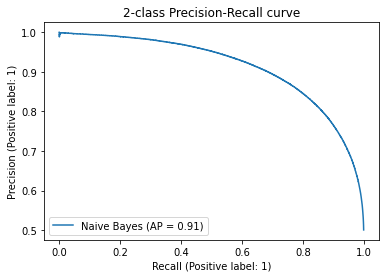

In [61]:
display = PrecisionRecallDisplay.from_estimator(
    NB_clf, x_te, y_te, name="Naive Bayes")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [64]:
y_pred = NB_clf.predict(x_te)
p=metrics.precision_score(y_te, y_pred, average="weighted")
r=metrics.recall_score(y_te, y_pred, average="weighted")
f1=metrics.f1_score(y_te, y_pred, average="weighted")
print("precision={}".format(p))
print("recall=   {}".format(r))
print("f1=       {}".format(f1))
Test_scores = Test_scores.append({'Classifier' : 'Naive Bayes','Precision' : p,'Recall': r,'F1':f1}, ignore_index = True)

precision=0.8277882219172047
recall=   0.8275851851851852
f1=       0.827558702592812


## **LOGISTIC** **REGRESSION**

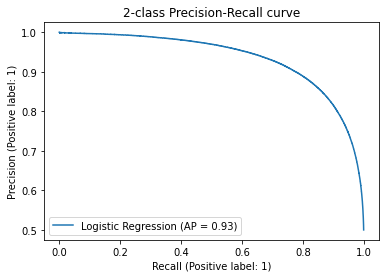

In [65]:
display = PrecisionRecallDisplay.from_estimator(
    logreg_clf, x_te, y_te, name="Logistic Regression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [66]:
y_pred = logreg_clf.predict(x_te)
p=metrics.precision_score(y_te, y_pred, average="weighted")
r=metrics.recall_score(y_te, y_pred, average="weighted")
f1=metrics.f1_score(y_te, y_pred, average="weighted")
print("precision={}".format(p))
print("recall=   {}".format(r))
print("f1=       {}".format(f1))
Test_scores = Test_scores.append({'Classifier' : 'Logistic Regression','Precision' : p,'Recall': r,'F1':f1}, ignore_index = True)

precision=0.8552812090069776
recall=   0.8552361111111111
f1=       0.8552315969025807


## **DECISION** **TREES**

In [79]:
y_pred = tree_clf.predict(x_te)
p=metrics.precision_score(y_te, y_pred, average="weighted")
r=metrics.recall_score(y_te, y_pred, average="weighted")
f1=metrics.f1_score(y_te, y_pred, average="weighted")
print("precision={}".format(p))
print("recall=   {}".format(r))
print("f1=       {}".format(f1))
Test_scores = Test_scores.append({'Classifier' : 'Decision Tree','Precision' : p,'Recall': r,'F1':f1}, ignore_index = True)

precision=0.752006691892264
recall=   0.7519166666666667
f1=       0.7518942231061254


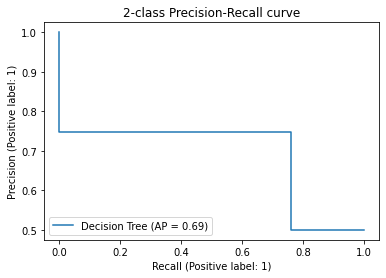

In [80]:
display = PrecisionRecallDisplay.from_predictions(y_te, y_pred, name="Decision Tree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

## **K** **NEIGHBOR**

In [78]:
y_pred = kn_clf.predict(x_te)
p=metrics.precision_score(y_te, y_pred, average="weighted")
r=metrics.recall_score(y_te, y_pred, average="weighted")
f1=metrics.f1_score(y_te, y_pred, average="weighted")
print("precision={}".format(p))
print("recall=   {}".format(r))
print("f1=       {}".format(f1))
Test_scores = Test_scores.append({'Classifier' : 'K Neighbors','Precision' : p,'Recall': r,'F1':f1}, ignore_index = True)

KeyboardInterrupt: ignored

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_te, y_pred, name="K Neighbors")
_ = display.ax_.set_title("2-class Precision-Recall curve")